# All Lending Club loan data

Importing useful libraries for EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("lending_club_loan_two.csv")
means=pd.read_csv("lending_club_info.csv",index_col="LoanStatNew")
means.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [3]:
def col_mean(x):  #Writing a function for finding meaning of column
    return means.loc[x,"Description"]

In [4]:
col_mean("loan_status")

'Current status of the loan'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [6]:
def missing_values(df):    #We are gonna create a dictionary that shows us missing values.
    d={}
    for i in df.columns:
        d[i]=len(df) - df[i].count()
    return d

In [12]:
missing_values(df)

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 22927,
 'emp_length': 18301,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 1755,
 'dti': 0,
 'earliest_cr_line': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 276,
 'total_acc': 0,
 'initial_list_status': 0,
 'application_type': 0,
 'mort_acc': 37795,
 'pub_rec_bankruptcies': 535,
 'address': 0}

Since we are predicting the loan status label first we should countplot it.

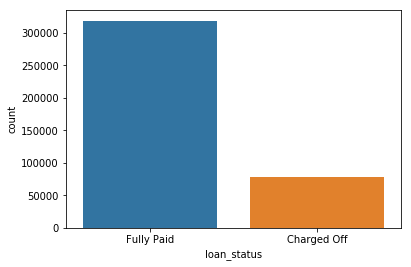

In [8]:
sns.countplot(x="loan_status",data=df);

As we see classes are not balanced , at the evaluation part we shouldn't analize it with just accuracy.

### Now time for some feature analysis

In [9]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


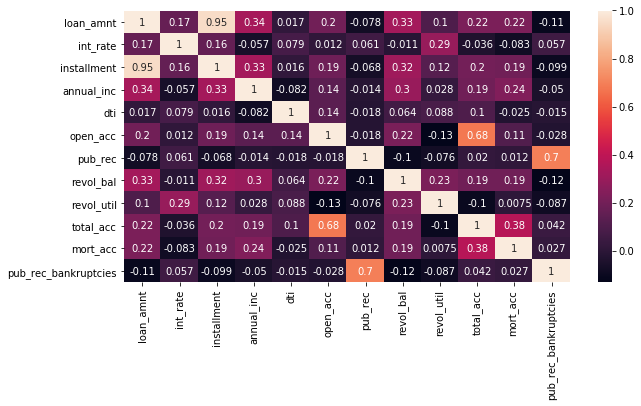

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True);

In [21]:
print("Information of 'loan_amnt' :",col_mean("loan_amnt"))

Information of 'loan_amnt' : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [22]:
print("Information of 'installment' :",col_mean("installment"))

Information of 'installment' : The monthly payment owed by the borrower if the loan originates.


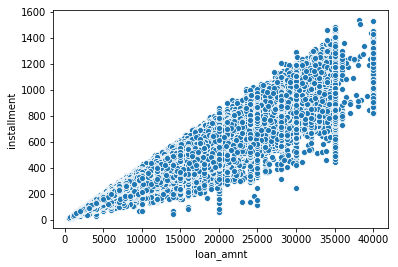

In [23]:
sns.scatterplot(x="loan_amnt",y="installment",data=df);

Correlation between "loan_amnt" and "installment" looks high because it seems there is nearly same information..

In [25]:
df.groupby("loan_status").describe()["loan_amnt"]

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [26]:
df["grade"].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

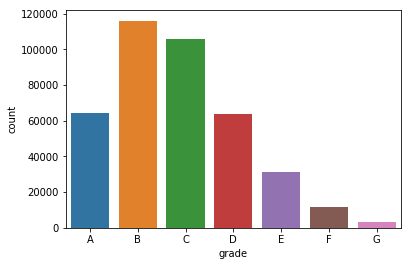

In [28]:
sns.countplot(x="grade",data=df,order=sorted(df["grade"].unique()));

In [29]:
df["sub_grade"].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

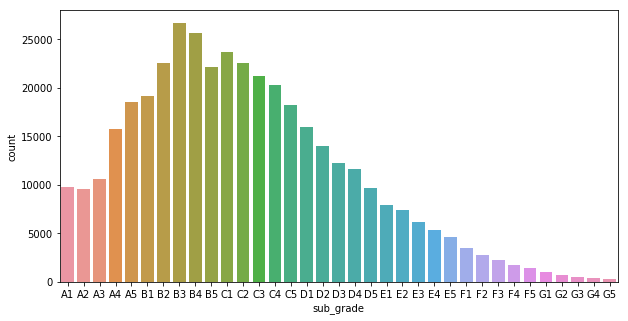

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x="sub_grade",data=df,order=sorted(df["sub_grade"].unique()));

Now let's change our label column into binary (0,1)..

In [32]:
df["loan_status"]=df["loan_status"].replace({"Fully Paid":1,"Charged Off":0})

And lets plot correlation with features.

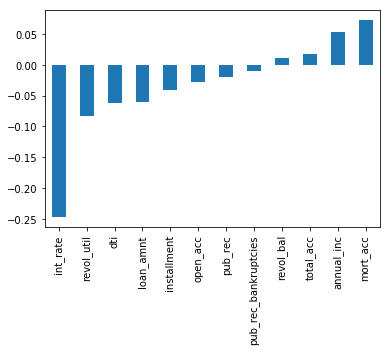

In [35]:
df.corr()["loan_status"].sort_values().drop("loan_status",axis=0).plot(kind="bar");

### Handling Missing Values

-Here is some columns with missing datas.

In [38]:
for i in missing_values(df):
    if missing_values(df)[i] != 0:
        print(i)

emp_title
emp_length
title
revol_util
mort_acc
pub_rec_bankruptcies


In [42]:
df["emp_title"].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
Sales                              1638
Project Manager                    1505
Owner                              1410
Driver                             1339
Office Manager                     1218
manager                            1145
Director                           1089
General Manager                    1074
Engineer                            995
teacher                             962
driver                              882
Vice President                      857
Operations Manager                  763
Administrative Assistant            756
Accountant                          748
President                           742
owner                               697
Account Manager                     692
Police Officer                      686
supervisor                          673


It looks like this column got too many category so we can drop it.

In [43]:
df=df.drop("emp_title",axis=1)

In [44]:
df["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [48]:
emp_len=df["emp_length"].dropna().unique()

In [50]:
ordered=['< 1 year','1 year','2 years', '3 years', '4 years','5 years', '7 years','6 years', '8 years','9 years' ,'10+ years' ]

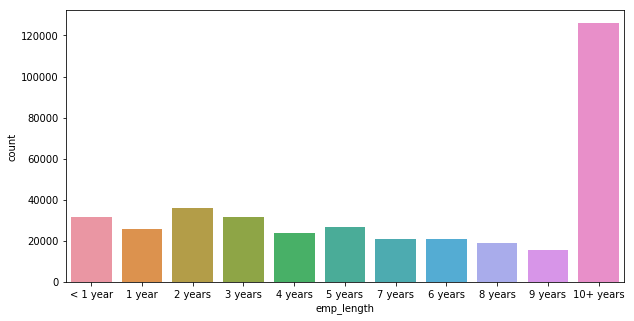

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x="emp_length",data=df,order=ordered);

In [56]:
fp=df[df["loan_status"]==1].groupby("emp_length").count()["loan_status"]
co=df[df["loan_status"]==0].groupby("emp_length").count()["loan_status"]

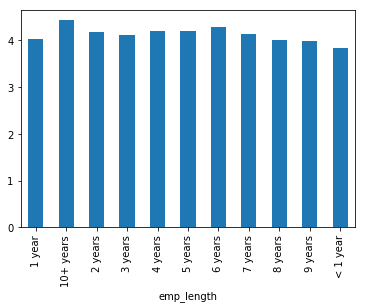

In [60]:
(fp/co).plot(kind="bar");

It seems that we should drop "emp_length" column.

In [61]:
df=df.drop("emp_length",axis=1)

In [62]:
missing_values(df)

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'title': 1755,
 'dti': 0,
 'earliest_cr_line': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 276,
 'total_acc': 0,
 'initial_list_status': 0,
 'application_type': 0,
 'mort_acc': 37795,
 'pub_rec_bankruptcies': 535,
 'address': 0}

In [63]:
df["title"].value_counts()

Debt consolidation                        152472
Credit card refinancing                    51487
Home improvement                           15264
Other                                      12930
Debt Consolidation                         11608
Major purchase                              4769
Consolidation                               3852
debt consolidation                          3547
Business                                    2949
Debt Consolidation Loan                     2864
Medical expenses                            2742
Car financing                               2139
Credit Card Consolidation                   1775
Vacation                                    1717
Moving and relocation                       1689
consolidation                               1595
Personal Loan                               1591
Consolidation Loan                          1299
Home Improvement                            1268
Home buying                                 1183
Credit Card Refinanc

In [65]:
df["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

Seems that at this column data is similar to purpose column.

In [64]:
df=df.drop("title",axis=1)

In [67]:
100*df["mort_acc"].isna().sum()/len(df) # Percentage of missing value of "mort_acc" column

9.54346892912153

In [68]:
df=df.drop("mort_acc",axis=1) #Dropping column for big percentage

Other columns have lower percentage of missing value so we can drop them by row.

In [70]:
df.dropna(inplace=True)

In [72]:
missing_values(df) #As we see now our dataset is without any missing value

{'loan_amnt': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'loan_status': 0,
 'purpose': 0,
 'dti': 0,
 'earliest_cr_line': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 0,
 'total_acc': 0,
 'initial_list_status': 0,
 'application_type': 0,
 'pub_rec_bankruptcies': 0,
 'address': 0}

#### Lets look which columns are categorical which are continuous, after we should encode these categorical features.

In [73]:
df.select_dtypes("object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [74]:
df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [85]:
df["term"]=df["term"].replace({" 36 months":36," 60 months":60}).astype("int64")

As we see previously grade column a part of sub_grade column so we can drop this column.

In [76]:
df=df.drop("grade",axis=1)

In [77]:
df=pd.get_dummies(df,columns=["sub_grade"],drop_first=True,)

In [87]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [88]:
df["home_ownership"]=df["home_ownership"].replace({"NONE":"OTHER","ANY":"OTHER"})

In [90]:
df=pd.get_dummies(df,columns=['verification_status', 'application_type','initial_list_status','purpose','home_ownership'],drop_first=True)

In [92]:
df["zipcode"]=df["address"].apply(lambda x: x[-5:])

In [102]:
df=df.drop("address",axis=1)

In [95]:
df["zipcode"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [96]:
df=pd.get_dummies(df,columns=["zipcode"],drop_first=True)

In [97]:
df=df.drop("issue_d",axis=1)

In [100]:
df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"])
df["earliest_cr_year"]=df["earliest_cr_line"].dt.year
df=df.drop("earliest_cr_line",axis=1)

In [104]:
df.select_dtypes("object").columns #Finally we are ready for our algorithm

Index([], dtype='object')

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [106]:
import tensorflow as tf

In [109]:
X=df.drop("loan_status",axis=1).values
y=df["loan_status"].values

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [112]:
X_train.shape

(316175, 77)

In [113]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=80,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(units=40,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(units=20,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(units=1,activation="sigmoid")) #Binary classification

In [114]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [115]:
model.fit(X_train,y_train,batch_size=256,validation_data=(X_test,y_test),epochs=50)

W0528 01:54:28.962599 10912 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 4s 12us/sample - loss: 0.3117 - val_loss: 0.2650
Epoch 2/50
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2686 - val_loss: 0.2628
Epoch 3/50
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2650 - val_loss: 0.2626
Epoch 4/50
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2633 - val_loss: 0.2629
Epoch 5/50
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2627 - val_loss: 0.2622
Epoch 6/50
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2622 - val_loss: 0.2624
Epoch 7/50
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2619 - val_loss: 0.2615
Epoch 8/50
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2611 - val_loss: 0.2623
Epoch 9/50
316175/316175 [==============================] - 3s 9us/sample - loss: 

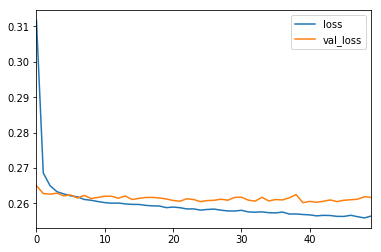

In [123]:
losses=pd.DataFrame(model.history.history)
losses.plot();

In [117]:
predictions=model.predict_classes(X_test)

In [118]:
print("Accuracy Score :",accuracy_score(y_test,predictions)) # Accuracy score is not a good criteria because our classes are not balanced..

Accuracy Score : 0.8870755528566369


In [120]:
print("Confusion Matrix\n",confusion_matrix(y_test,predictions))

Confusion Matrix
 [[ 6703  8869]
 [   57 63415]]


In [121]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15572
           1       0.88      1.00      0.93     63472

   micro avg       0.89      0.89      0.89     79044
   macro avg       0.93      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [122]:
df.shape

(395219, 78)